# Fleet Vehicles Fuel Consumption

- Dataset showing how much fuel each council vehicle has consumed, by year and by fuel type.
- The following information refers to the columns in the data:
1. Fleet = fleet number (specific number used to identify a vehicle)
2. Vehicle = vehicle type
3. Fuel = fuel used in litres
4. Dist.Run = Total mileage for the reporting period
5. MPG = Miles Per Gallon

In [372]:
#importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import Lasso, Ridge, LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

In [373]:
#Loading the dataset

df = pd.read_csv('/content/2018-19-4.csv')
df.head()

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG
0,1,U1,Jaguar XJL Portfolio V6 D Limousine,Diesel,66089,4140,Miles,24.10
1,12,FL65FBA,Vauxhall CORSA CDTI Car,Diesel,6075,1958,Miles,45.10
2,13,MJ16XMY,Vauxhall Mokka 4x4 Utility Vehicle,Diesel,21650,5060,Miles,43.73
3,18,YD16NAK,Peugeot 308 Car Car,Diesel,64740,42009,Miles,53.23
4,20,YH17VCF,Peugeot Expert Combi 9 seat MPV,Diesel,19023,8934,Miles,36.90


In [374]:
df.shape

(739, 8)

In [375]:
#Since we are dealing with miles, we will remove every row that contains kilometer values to ensure consistency

df = df.copy()

df= df[df['Unit'] == 'Miles']
df.shape

(669, 8)

In [376]:
#Checking to see if there are any kilometer values

df['Unit'].unique()

array(['Miles'], dtype=object)

- The df has no kilometer values

In [377]:
#Checking for nulls

df.isna().sum().sum()

np.int64(0)

In [378]:
#Checking for duplicates

df.duplicated().sum()

np.int64(0)

In [379]:
#Checking for data info

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 669 entries, 0 to 730
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        669 non-null    object 
 1   Registration  669 non-null    object 
 2   Details       669 non-null    object 
 3   Product       669 non-null    object 
 4   Odometer      669 non-null    int64  
 5   Distance      669 non-null    int64  
 6   Unit          669 non-null    object 
 7   MPG           669 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 47.0+ KB


In [380]:
#Summary statistics

df.describe()

,Odometer,Distance,MPG
count,669.000000,669.000000,669.000000
mean,43914.158445,6723.100149,27.991271
std,31333.428293,4111.728716,10.476730
min,287.000000,151.000000,3.830000
25%,23186.000000,3906.000000,19.820000
50%,39073.000000,5955.000000,25.940000
75%,56260.000000,8686.000000,35.580000
max,423328.000000,42009.000000,57.810000


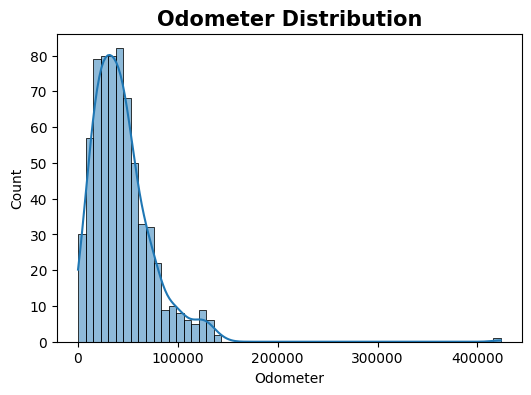

In [381]:
#Visualizations

#Histograms

plt.figure(figsize = (6,4))
sns.histplot(df['Odometer'], kde = True)
plt.title('Odometer Distribution', size = 15, weight = 'bold')
plt.show()

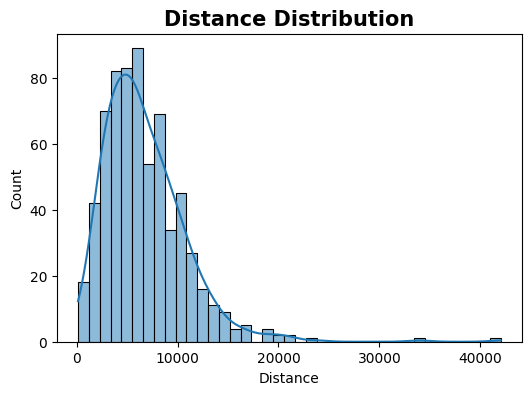

In [382]:
plt.figure(figsize = (6,4))
sns.histplot(df['Distance'], kde = True)
plt.title('Distance Distribution', size = 15, weight = 'bold')
plt.show()

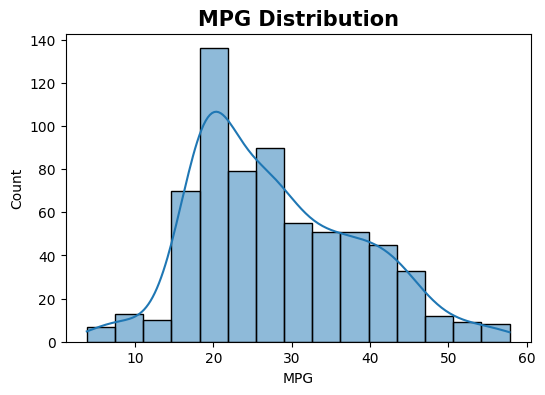

In [383]:
plt.figure(figsize = (6,4))
sns.histplot(df['MPG'], kde = True)
plt.title('MPG Distribution', size = 15, weight = 'bold')
plt.show()

<ipython-input-384-4ec5928e176c>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels())


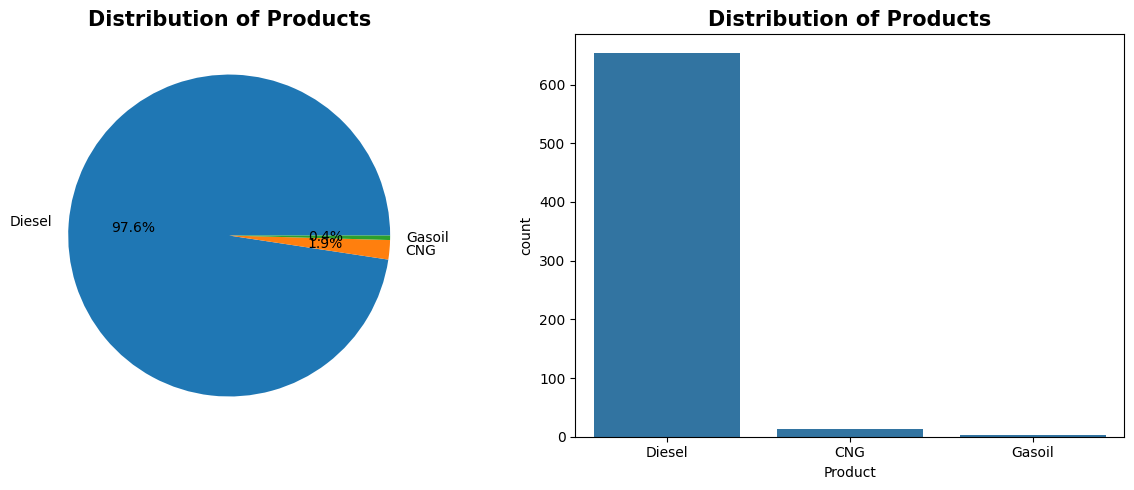

In [384]:
#Piechart for Product Column
size = df['Product'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].pie(size, labels=size.index, autopct='%1.1f%%')
axes[0].set_title('Distribution of Products', fontsize=15, fontweight='bold')

sns.countplot(x=df['Product'], ax=axes[1])
axes[1].set_title('Distribution of Products', fontsize=15, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels())

plt.tight_layout()
plt.show()

<ipython-input-385-9214ab2a2d3a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = df['Product'], y = df['MPG'], palette = 'viridis')


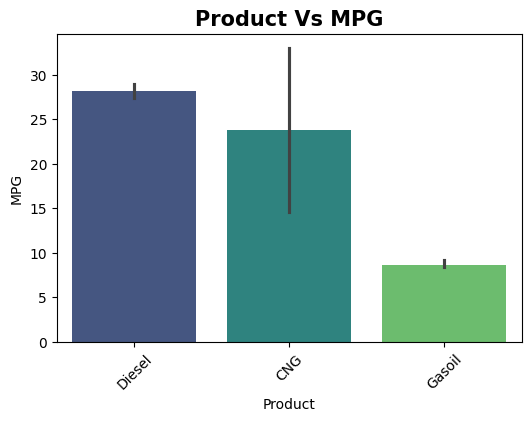

In [385]:
#Barplot

plt.figure(figsize = (6,4))
sns.barplot(x = df['Product'], y = df['MPG'], palette = 'viridis')
plt.title('Product Vs MPG', size = 15, weight = 'bold')
plt.xticks(rotation = 45)
plt.show()

<ipython-input-386-0c34891cb8f8>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(new2, palette = 'viridis')


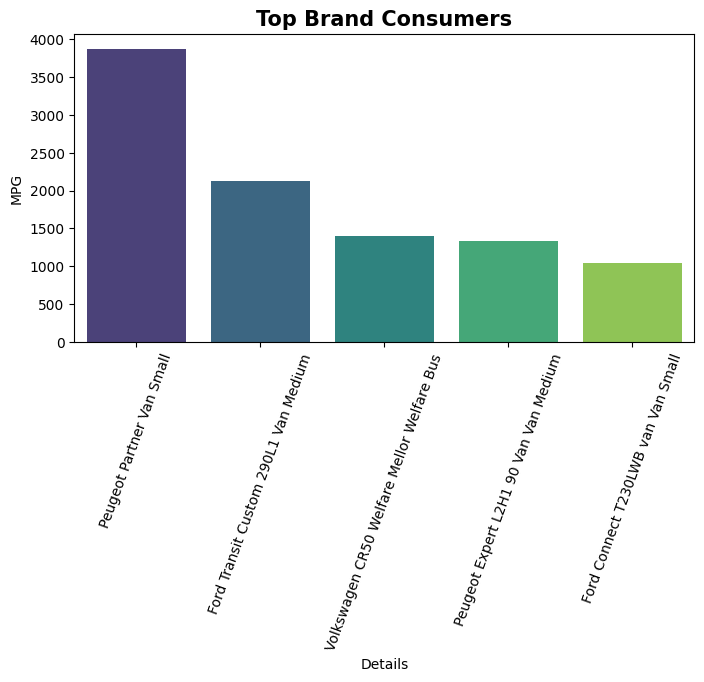

In [386]:
new = df.groupby('Details')['MPG'].sum()
new2 = new.sort_values(ascending = False)[:5]
new3 = new.sort_values(ascending = True)[:5]

plt.figure(figsize = (8,4))
sns.barplot(new2, palette = 'viridis')
plt.title('Top Brand Consumers', size = 15, weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

<ipython-input-387-b44107e82c98>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(new3, palette = 'viridis')


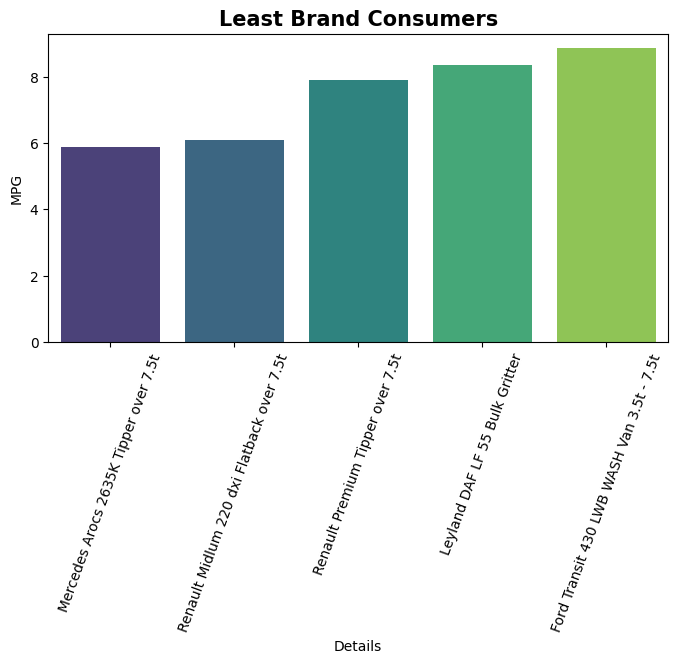

In [387]:
plt.figure(figsize = (8,4))
sns.barplot(new3, palette = 'viridis')
plt.title('Least Brand Consumers', size = 15, weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

Registration
MW16CZC    57.81
MW16CZP    57.68
MW16CZZ    57.07
MJ16XMA    56.91
MV17CPZ    56.45
Name: MPG, dtype: float64


<ipython-input-388-d7d420d891b6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(reg2, palette = 'viridis')


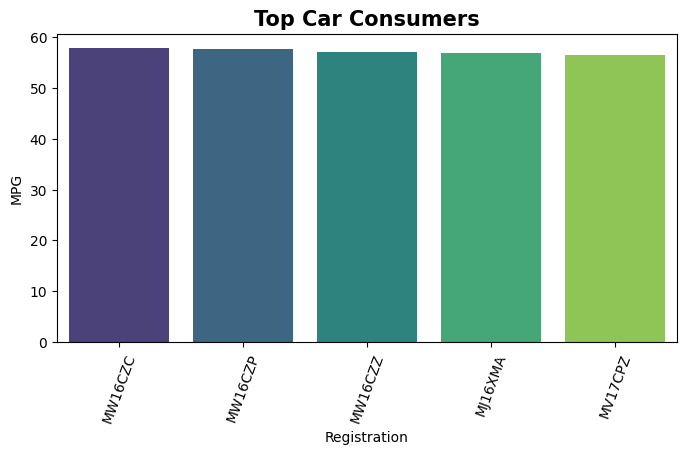

In [388]:
#Car with the highest consumption

reg = df.groupby('Registration')['MPG'].sum()
reg2 = reg.sort_values(ascending = False)[:5]
reg3 = reg.sort_values(ascending = True)[:5]

print(reg2)
plt.figure(figsize = (8,4))
sns.barplot(reg2, palette = 'viridis')
plt.title('Top Car Consumers', size = 15, weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

<ipython-input-389-506bd87883ea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(reg3, palette = 'viridis')


Registration
YF62EAX    3.83
YF13EPD    3.86
YJ13MTX    4.42
YJ13MTV    5.27
YF62EAY    5.74
Name: MPG, dtype: float64


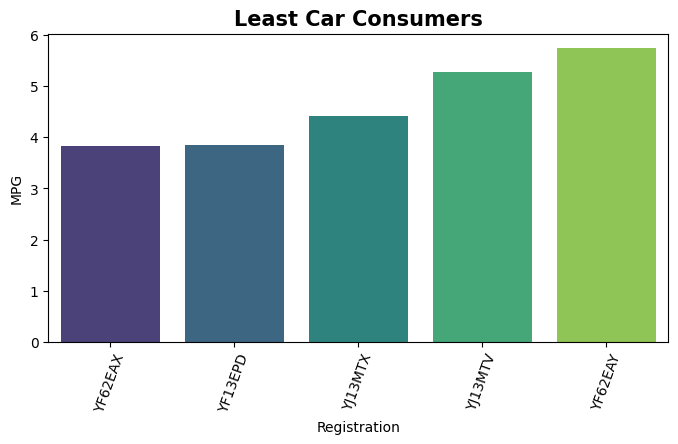

In [389]:
plt.figure(figsize = (8,4))
sns.barplot(reg3, palette = 'viridis')
plt.title('Least Car Consumers', size = 15, weight = 'bold')
plt.xticks(rotation = 70)
print(reg3)
plt.show()

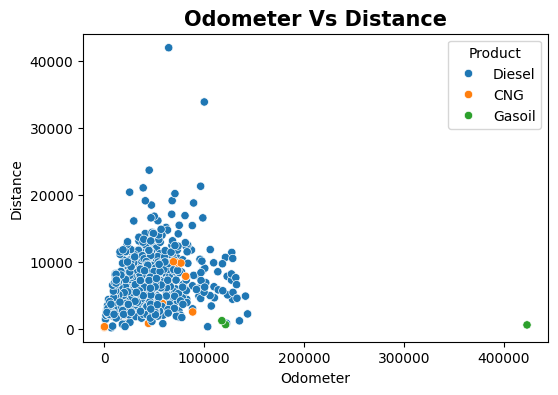

In [390]:
#Scatterplots

plt.figure(figsize = (6,4))
sns.scatterplot(x = df['Odometer'], y = df['Distance'], hue = df['Product'])
plt.title('Odometer Vs Distance', size = 15, weight = 'bold')
plt.show()

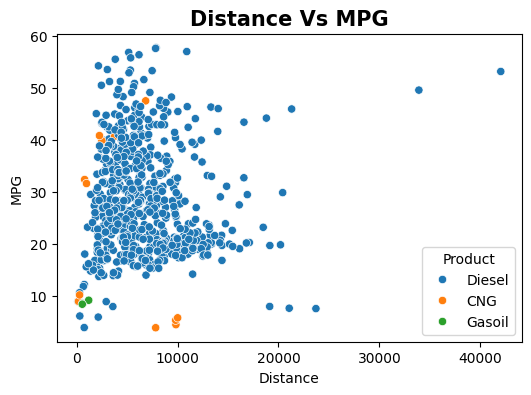

In [391]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = df['Distance'], y = df['MPG'], hue = df['Product'])
plt.title('Distance Vs MPG', size = 15, weight = 'bold')
plt.show()

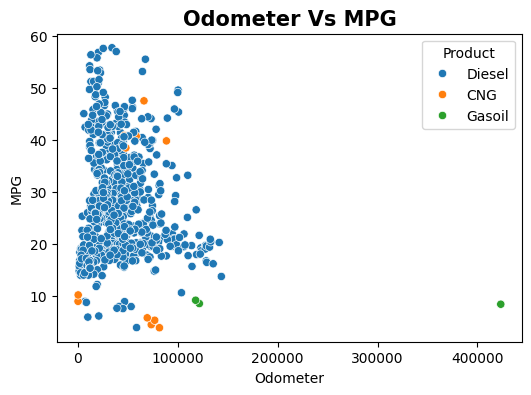

In [392]:
plt.figure(figsize = (6,4))
sns.scatterplot(x = df['Odometer'], y = df['MPG'], hue = df['Product'])
plt.title('Odometer Vs MPG', size = 15, weight = 'bold')
plt.show()

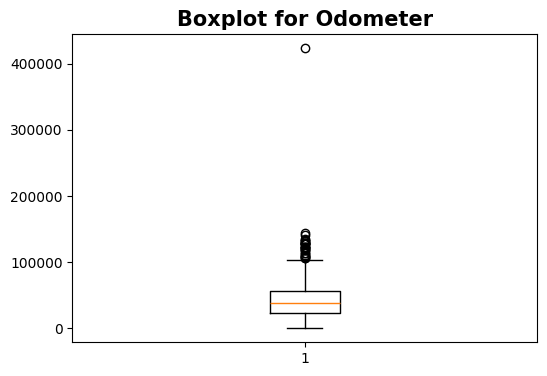

In [393]:
#Checking for outliers

plt.figure(figsize = (6,4))
plt.boxplot(df['Odometer'])
plt.title('Boxplot for Odometer', size = 15, weight = 'bold')
plt.show()

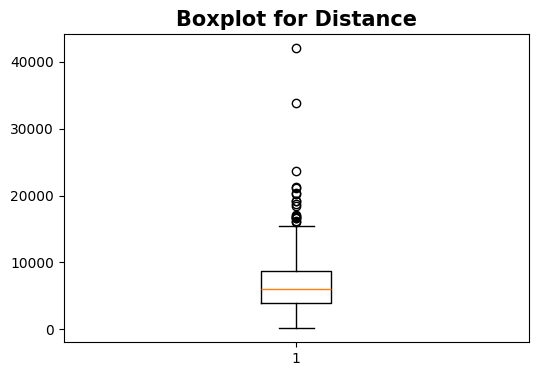

In [394]:
plt.figure(figsize = (6,4))
plt.boxplot(df['Distance'])
plt.title('Boxplot for Distance', size = 15, weight = 'bold')
plt.show()

In [395]:
#Removing the outlier values
df= df.copy()

cols = df[['Odometer', 'Distance']]

for col in cols.columns:

  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3-Q1

  lower_bound = Q1-IQR*3
  upper_bound = Q3+IQR*3

  outliers = df[(df[col]< lower_bound) | (df[col]>upper_bound)]

len(outliers)

#Removng them

df = df[(df[col]>= lower_bound) & (df[col]<=upper_bound)]
df.shape

(666, 8)

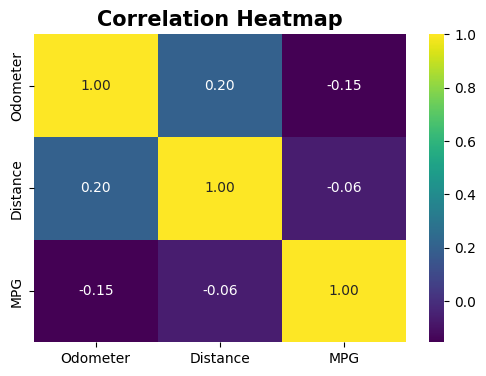

In [396]:
#Correlation heatmap

cols = df[['Odometer', 'Distance', 'MPG']]

plt.figure(figsize = (6,4))
sns.heatmap(cols.corr(), cmap = 'viridis', annot = True, fmt = '.2f')
plt.title('Correlation Heatmap', size = 15, weight = 'bold')
plt.show()

In [397]:
#Label Encoding

le = LabelEncoder()

df['Product_encoded'] =le.fit_transform(df['Product'])

In [398]:
x = df['Product'].unique()

category_mapping = {category: i for i, category in enumerate(x)}
category_mapping

{'Diesel': 0, 'CNG': 1, 'Gasoil': 2}

In [399]:
#Feature Engineering

X = df.drop(columns = ['Number', 'Registration', 'Details', 'Unit', 'Product', 'MPG'], axis = 1)
y = df['MPG']

In [400]:
df.head()

,Number,Registration,Details,Product,Odometer,Distance,Unit,MPG,Product_encoded
0,1,U1,Jaguar XJL Portfolio V6 D Limousine,Diesel,66089,4140,Miles,24.10,1
1,12,FL65FBA,Vauxhall CORSA CDTI Car,Diesel,6075,1958,Miles,45.10,1
2,13,MJ16XMY,Vauxhall Mokka 4x4 Utility Vehicle,Diesel,21650,5060,Miles,43.73,1
4,20,YH17VCF,Peugeot Expert Combi 9 seat MPV,Diesel,19023,8934,Miles,36.90,1
5,80,YC59GZB,Ford Kuga Zetec 4x4 Utility Vehicle,Diesel,72335,4113,Miles,38.37,1


In [401]:
#Splitting

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [402]:
#Fitting the model

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2:', r2)
print('MSE:', round(mse, 2))
print('MAE:', round(mae, 2))

R2: 0.03783088449701877
MSE: 99.09
MAE: 8.19


In [403]:
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2:', r2)
print('MSE:', round(mse, 2))
print('MAE:', round(mae, 2))

R2: 0.041444351077170594
MSE: 98.72
MAE: 8.18


In [404]:
ridge = Lasso(alpha = 0.1)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('R2:', r2)
print('MSE:', round(mse, 2))
print('MAE:', round(mae, 2))

R2: 0.041444351077170594
MSE: 98.72
MAE: 8.18


In [405]:
#Saving the linear regression model

joblib.dump(lr, 'model2.pkl')
print('Model has been saved successfully')

Model has been saved successfully
